In [1]:
# Common
import os
import keras 
import numpy as np

# Data
from keras.preprocessing.image import ImageDataGenerator as IDG

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-Trained Models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2, ResNet50V2, ResNet50

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Layer, ReLU, Add, InputLayer, Multiply

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model viz


In [2]:
# Initialize DataGenerator
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=45, validation_split=0.2)

# Load Data
train_ds = train_gen.flow_from_directory("dataset", target_size=(256,256), class_mode="categorical", subset='training', shuffle=True, batch_size=32)
valid_ds = train_gen.flow_from_directory("dataset", target_size=(256,256), class_mode="categorical", subset='validation', shuffle=True, batch_size=32)



Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [3]:
class_names = [f for f in os.listdir("dataset") if not f.startswith('.')]
n_classes = len(class_names)

print(f"Total No. of Classes : {n_classes}")

Total No. of Classes : 11


In [4]:
class_dis = [len(os.listdir("dataset" + "/" + name)) for name in class_names]
class_dis

[377, 692, 639, 526, 1160, 475, 851, 591, 698, 232, 621]

In [5]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

name = 'resnet2'
# TL Model
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3))
base_model.trainable = False

# Model
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation="softmax")
])

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
cbs = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]
opt = tf.keras.optimizers.Adam(learning_rate=0.0015)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 8, 8, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1

## Train the model


In [6]:
history = model.fit(train_ds, epochs=20, callbacks=cbs, validation_data=valid_ds)

Epoch 1/20
172/172 [==============================] - 700s 4s/step - loss: 0.9391 - accuracy: 0.6892 - val_loss: 0.4895 - val_accuracy: 0.8386


/people/home/mshaaban/venv/lib64/python3.6/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
172/172 [==============================] - 691s 4s/step - loss: 0.5608 - accuracy: 0.8103 - val_loss: 0.4711 - val_accuracy: 0.8466
Epoch 3/20
172/172 [==============================] - 690s 4s/step - loss: 0.4918 - accuracy: 0.8349 - val_loss: 0.4547 - val_accuracy: 0.8466
Epoch 4/20
172/172 [==============================] - 692s 4s/step - loss: 0.4404 - accuracy: 0.8545 - val_loss: 0.4496 - val_accuracy: 0.8554
Epoch 5/20
172/172 [==============================] - 690s 4s/step - loss: 0.4028 - accuracy: 0.8662 - val_loss: 0.4412 - val_accuracy: 0.8510
Epoch 6/20
172/172 [==============================] - 691s 4s/step - loss: 0.3974 - accuracy: 0.8626 - val_loss: 0.4336 - val_accuracy: 0.8641
Epoch 7/20
172/172 [==============================] - 693s 4s/step - loss: 0.3481 - accuracy: 0.8777 - val_loss: 0.4571 - val_accuracy: 0.8451
Epoch 8/20
172/172 [==============================] - 692s 4s/step - loss: 0.3334 - accuracy: 0.8884 - val_loss: 0.4431 - val_accuracy: 0.8524

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [8]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

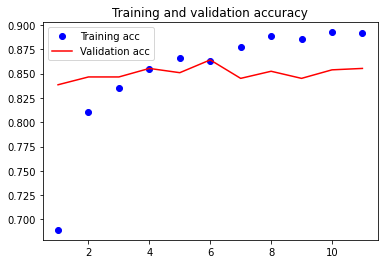

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

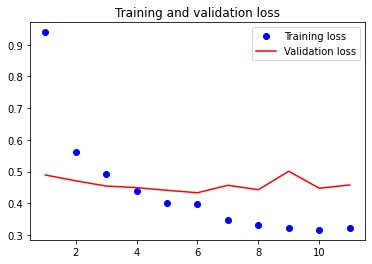

In [10]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()